# **Objetivos**

Se quiere responder 5 preguntas clave:

- ¿Cuáles son los factores que influyen en el rendimiento de los estudiantes?
- ¿Cuáles son los temas que mejor dominan los estudiantes?
- ¿Cuáles son los temas que peor rendimiento registran los estudiantes?
- ¿Cuál es el GPA promedio de los estudiantes y que factores influencian el resultado?
- ¿Qué estudiantes obtienen mejor desempeño según su género?

# **Metodología**

Para este proyecto se ha elegido la metodología CRISP-DM que define una serie de pasos y fases estructuradas para estandarizar el proceso de análisis y la presentación de resultados.

La metodología CRISP-DM (Cross Industry Standard Process for Data Mining) es una de las más usadas para proyectos de análisis de datos y minería.

# **Alcance**

Durante el análisis solo se tratará de responder a las preguntas indicadas y se relacionará información clave a medida que vaya surgiendo en el proceso de exploración.

Este proyecto busca encontrar datos que permiten tomar decisiones administrativas que beneficien a los estudiantes, adoptando la metodología de caso de estudio como base para el análisis en el conjunto de datos de Kaggle.

El fin último del proyecto es servir de práctica para entrenar las habilidades técnicas en el manejo de proyectos de análisis de datos con Python, usando librerías como `Numpy`, `Pandas`, `Matplotlib`, `Seaborn` o `Scikit-Learn`.

# **Importaciones**

In [2]:
# importa las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# desactiva las advertencias
warnings.filterwarnings('ignore')

# obtiene la ruta de los datos de Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-data-analysis/Students data.csv


In [3]:
# lee el conjunto de datos
df = pd.read_csv('/kaggle/input/students-data-analysis/Students data.csv')

# imprime un mensaje de confirmación
print('El conjunto de datos fue leído exitosamente.')

El conjunto de datos fue leído exitosamente.


# **Análisis Exploratorio de datos (EDA)**

In [4]:
# imprime las 8 primeras filas
print(df.head(8))

     ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  Statistics  \
0  1141     A    male     1  73.47       64         81         87          60   
1  1142     A  female     1  71.22       57         50         51          51   
2  1143     A  female     2  74.56       47         48         71          60   
3  1144     A  female     1  72.89       46         72         38          60   
4  1145     A  female     1  70.11       49         45         63          60   
5  1146     A    male     3  65.04       60         60         39          61   
6  1147     A    male     4  77.11       60         43         52          63   
7  1148     A  female     5  64.75       60         38         60          63   

   Probability  Measure  Functional_analysis from1 from2 from3  from4  y  
0           74       71                   60     A     A     A      3  0  
1           55       62                   61     B     A     A      2  0  
2           61       68                   64 

In [5]:
# imprime la estructura del dataset
print(df.shape)

(105, 17)


**NOTAS:**

- El conjunto de datos cuenta con **105** registros y **17** columnas.
- Este es un registro modesto para un análisis que se enfoca en encontrar información clave.

In [6]:
# imprime el nombre de las columnas en orden alfabético
print(df.columns.sort_values(ascending=True).tolist())

['Algebra', 'Calculus1', 'Calculus2', 'Functional_analysis', 'GPA', 'ID', 'Measure', 'Probability', 'Statistics', 'class', 'from1', 'from2', 'from3', 'from4', 'gender', 'race', 'y']


#### **Notas**

- Columnas como 'Algebra', 'Calculo 1', 'Calculo 2' y 'GPA' muestrarían información de los temas que ven los estudiantes.
- El conjunto de datos parece centrado en tópicos que se relacionan con las matemáticas y la ingeniería.
- Lo anterior es clave para elegir un enfoque basado en el análisis cuantitativo de los datos.

In [7]:
# Imprime la información del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

**NOTAS:**

- El conjunto de datos registra varias columnas númericas con predominancia de tipos enteros (**int64**).
- También se registra un columna de tipo flotante (**Int64**).
- Las columnas restantes pertenecen al tipo objetos (**object**).

In [8]:
# imprime el recuento de columnas por tipo de dato
print(df.dtypes.value_counts().sort_values(ascending=False))

int64      11
object      5
float64     1
Name: count, dtype: int64


In [9]:
# imprime el recuento de tipo de datos por proporciones
print(round(df.dtypes.value_counts(normalize=True)* 100, 2).sort_values(ascending=False))

int64      64.71
object     29.41
float64     5.88
Name: proportion, dtype: float64


**NOTAS:**

- **11** columnas de tipo entero representan el **64.71%** de todas las columnas.
- **5** columnas de tipo objetos representan el **29.41%** de todas las columnas.
- **1** columna de tipo flotante representa el **5.88%** restante.

**¿Qué sigue?**

- La preponderancia de datos enteros confirma la naturaleza cuantitativa del análisis.
- Ahora se puede seguir explorando más información que permita conocer el origen y la calidad de los datos.

In [10]:
# imprime las últimas 8 filas
print(df.tail(8))

       ID class  gender  race    GPA  Algebra  Calculus1  Calculus2  \
97   1238     A    male     1  91.14       98         90         98   
98   1239     A    male     1  90.31       84         82         99   
99   1240     B    male     1  88.10       87         70         95   
100  1241     A  female     1  88.34       87         83         92   
101  1242     B    male     1  89.84       98         77         95   
102  1243     B    male     1  88.82       83         80         91   
103  1244     A    male     1  86.60       92         82         91   
104  1245     A    male     1  93.71       93         97         99   

     Statistics  Probability  Measure  Functional_analysis from1 from2 from3  \
97           97           83       93                   89    AA     B     A   
98           97           89       96                   85     P     B     A   
99           97           91       93                   82    AB     B     A   
100          98           93       86   

#### **Verificación de valores faltantes, nulos o atípicos**

In [11]:
# obtiene el total de valores nulos y ordena de forma descendente
print(df.isnull().sum().sort_values(ascending=False))

ID                     0
Probability            0
from4                  0
from3                  0
from2                  0
from1                  0
Functional_analysis    0
Measure                0
Statistics             0
class                  0
Calculus2              0
Calculus1              0
Algebra                0
GPA                    0
race                   0
gender                 0
y                      0
dtype: int64


In [12]:
# obtiene el total de valores NaN y ordena de forma descendente
print(df.isna().sum().sort_values(ascending=False))

ID                     0
Probability            0
from4                  0
from3                  0
from2                  0
from1                  0
Functional_analysis    0
Measure                0
Statistics             0
class                  0
Calculus2              0
Calculus1              0
Algebra                0
GPA                    0
race                   0
gender                 0
y                      0
dtype: int64


**NOTAS:**

- No se halla evidencia de valores nulos, faltantes o atípicos.
- Los datos parecen completos.
- Hace falta mayor profundidad de análisis para verificar la calidad e integridad de los datos.

In [13]:
# obtiene el resumen estadístico de los datos
print(df.describe())

                ID        race         GPA     Algebra   Calculus1  \
count   105.000000  105.000000  105.000000  105.000000  105.000000   
mean   1193.000000    1.790476   82.957048   76.057143   71.961905   
std      30.454885    1.673867    6.053187   11.722618   12.197039   
min    1141.000000    1.000000   63.490000   46.000000   38.000000   
25%    1167.000000    1.000000   79.340000   67.000000   64.000000   
50%    1193.000000    1.000000   84.110000   76.000000   73.000000   
75%    1219.000000    1.000000   87.300000   84.000000   80.000000   
max    1245.000000    7.000000   93.710000   98.000000  100.000000   

        Calculus2  Statistics  Probability     Measure  Functional_analysis  \
count  105.000000  105.000000   105.000000  105.000000           105.000000   
mean    78.942857   85.133333    83.876190   80.761905            75.323810   
std     14.997326   10.269509    10.514363   10.296119            13.003324   
min     17.000000   51.000000    29.000000   54.00000

In [14]:
# obtiene el GPA promedio y almacena en una variable
course_score = df[['GPA']].mean().round(2).sort_values(ascending=False)

# imprime el resultado
print(course_score)

GPA    82.96
dtype: float64


In [15]:
# agrupa por GPA y calcula la suma de varios cursos de matemáticas
gpa_and_course_score = df.groupby('GPA')[['Algebra', 'Calculus1', 'Calculus2']].agg({'mean', 'median', 'min', 'max'}).reset_index().sort_values(by=['GPA'], ascending=False)

# imprime el resultado
print(gpa_and_course_score)

       GPA Algebra                  Calculus1                    Calculus2  \
               max min median  mean       max  min median   mean       max   
102  93.71      93  93   93.0  93.0        97   97   97.0   97.0        99   
101  93.06      82  82   82.0  82.0        90   90   90.0   90.0        93   
100  91.90      95  95   95.0  95.0        86   86   86.0   86.0        96   
99   91.74      94  94   94.0  94.0       100  100  100.0  100.0        96   
98   91.61      93  93   93.0  93.0        82   82   82.0   82.0        95   
..     ...     ...  ..    ...   ...       ...  ...    ...    ...       ...   
4    71.22      57  57   57.0  57.0        50   50   50.0   50.0        51   
3    70.11      49  49   49.0  49.0        45   45   45.0   45.0        63   
2    65.04      60  60   60.0  60.0        60   60   60.0   60.0        39   
1    64.75      60  60   60.0  60.0        38   38   38.0   38.0        60   
0    63.49      81  81   81.0  81.0        61   61   61.0   61.0

# **Visualización de datos**

Text(0, 0.5, 'Conteo')

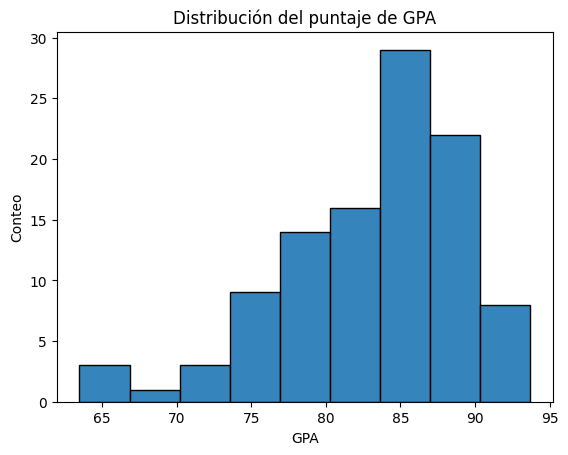

In [16]:
# crea un histograma de GPA
sns.histplot(df['GPA'], alpha = 0.9)
plt.title('Distribución del puntaje de GPA')
plt.ylabel('Conteo')

Text(0, 0.5, 'Conteo')

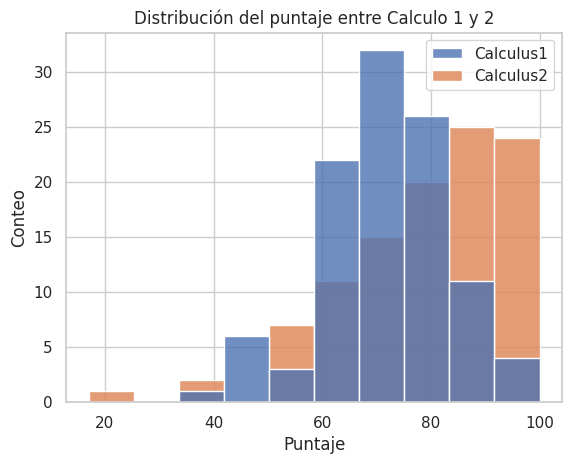

In [50]:
# crea un histograma de Calculo 1 y 2
sns.histplot(df[['Calculus1', 'Calculus2']], alpha=0.8, bins = 10)
plt.title('Distribución del puntaje entre Calculo 1 y 2')
plt.xlabel('Puntaje')
plt.ylabel('Conteo')

Text(0, 0.5, 'Conteo')

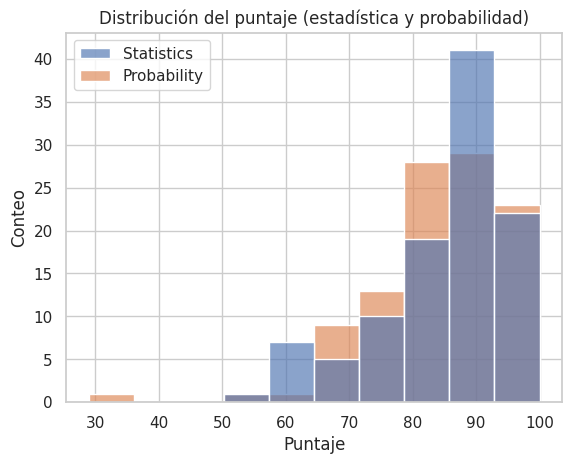

In [53]:
# crea un histograma de estadística y probabilidad
sns.histplot(df[['Statistics', 'Probability']], alpha = 0.65, bins = 10)
plt.title('Distribución del puntaje (estadística y probabilidad)')
plt.xlabel('Puntaje')
plt.ylabel('Conteo')

**NOTAS**

- La distribución de los cursos anteriores sigue una tendencia similar a la del GPA.
- Es lógico pensar que los estudiantes con un mejor GPA acumulado son:
    - Aquellos que obtienen una puntuación más alta en cursos de matemáticas y estadísticas.
    - Aquellos que reportan una asistencia constante a sus clases.


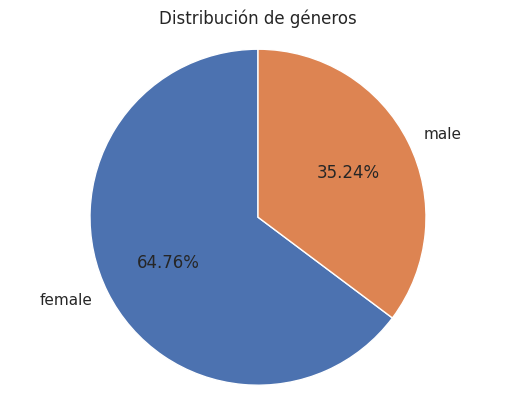

In [19]:
# crea una variable con el recuento de generos
gender_counts = df['gender'].value_counts()

# Aplica el estilo de Seaborn
sns.set(style="whitegrid")

# crea un gráfico circular con la distribución de los géneros
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', startangle=90)
plt.title('Distribución de géneros')
plt.axis('equal')
plt.show()

In [20]:
# imprime el recuento de generos
print(gender_counts)

gender
female    68
male      37
Name: count, dtype: int64


**NOTAS:**

- Se cuenta con registros de 68 estudiantes femeninas y 28 masculinos.
- La distribución y el recuento de géneros siguen un patron de tendencia global.
- Las mujeres se hacen cada vez más participes en áreas clave como STEM.


In [21]:
# imprime la proporción de estudiantes masculinos y femeninos
print(round(df['gender'].value_counts(normalize=True) * 100, 2))

gender
female    64.76
male      35.24
Name: proportion, dtype: float64


**NOTAS:**

- La proporción de estudiantes identificados como masculinos es de 35.24%.
- Mientras que las estudiantes que se identifican como femeninas asciende e 64.76%.
- Esto muestra una participación mayoritaria del grupo femenino en este conjunto de datos.

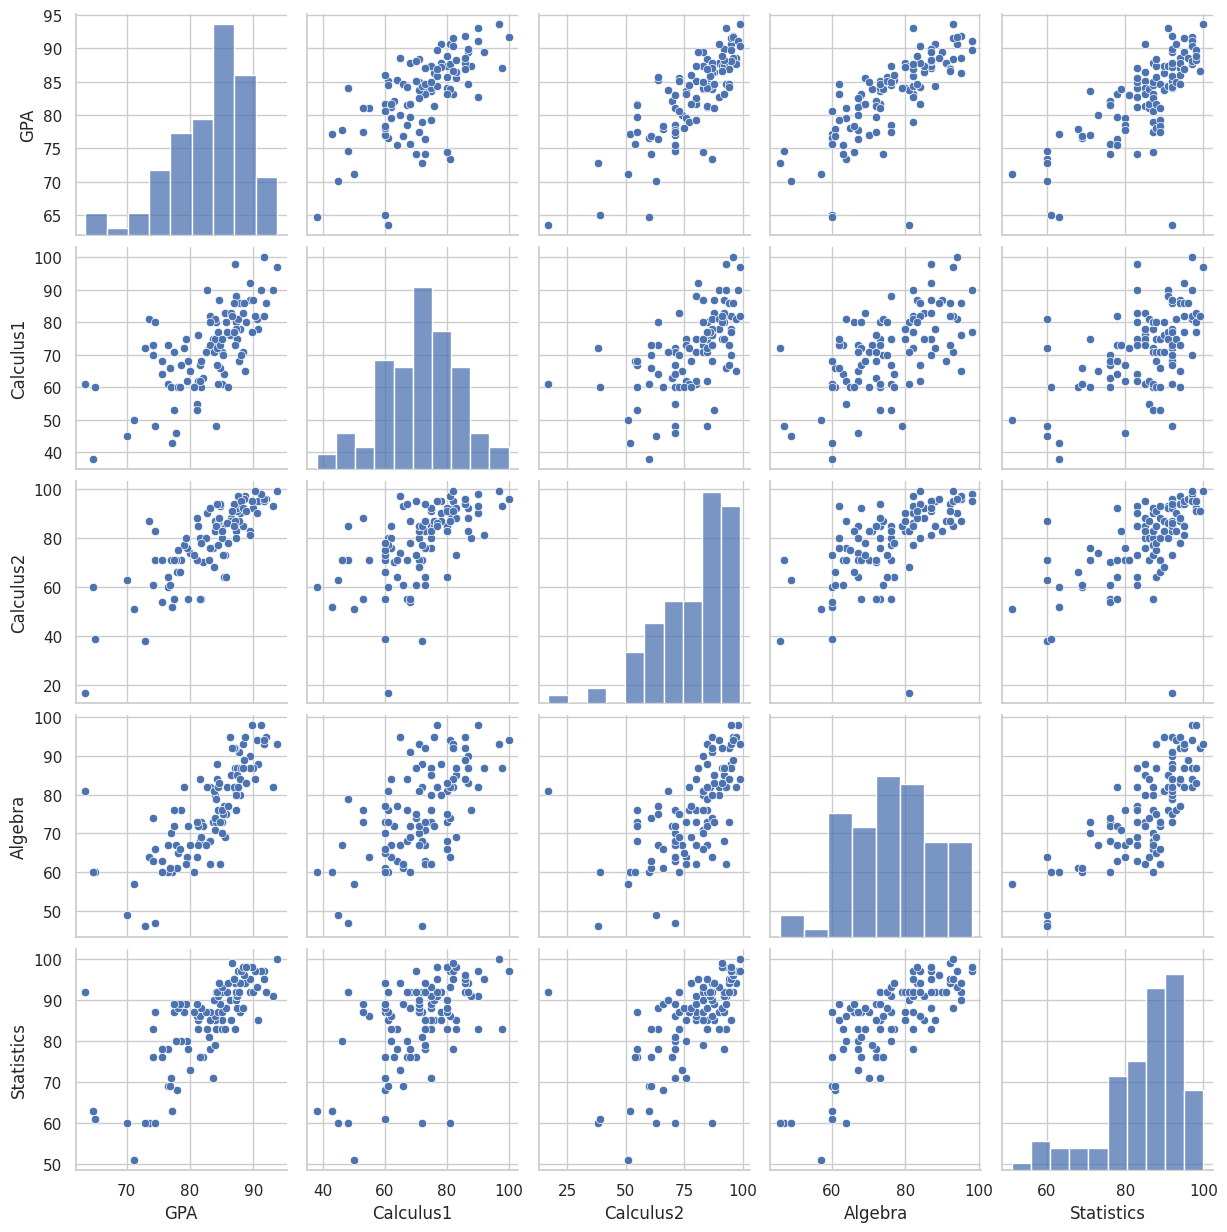

In [22]:
# visualiza un gráfico de pares
sns.pairplot(df[['GPA', 'Calculus1', 'Calculus2', 'Algebra', 'Statistics']])

In [23]:
print(df.columns.tolist())

['ID', 'class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y']


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [25]:
df

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2


In [26]:
# imprime los valores únicos
print(df.nunique())

ID                     105
class                    2
gender                   2
race                     7
GPA                    103
Algebra                 39
Calculus1               37
Calculus2               38
Statistics              30
Probability             36
Measure                 38
Functional_analysis     35
from1                   28
from2                    2
from3                    5
from4                    3
y                        3
dtype: int64


In [27]:
# imprime todos los valores únicos de calificaciones en from1
print('Valores únicos de from1:\n', df['from1'].unique().tolist())

Valores únicos de from1:
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'U', 'V', 'T', 'Z', 'W', 'X', 'Y', 'AA', 'AB']


In [28]:
# imprime los valores únicos de calificaciones en from2
print('Valores únicos de from2:\n', df['from2'].unique().tolist())

Valores únicos de from2:
 ['A', 'B']


In [29]:
# imprime los valores únicos de calificaciones en from3
print('Valores únicos de from3:\n', df['from3'].unique().tolist())

Valores únicos de from3:
 ['A', 'C', 'D', 'B', 'S']


In [30]:
# imprime el recuento de valoes de calificaciones from1
print(df['from1'].value_counts())

from1
B     9
E     9
P     8
X     7
K     6
M     5
N     5
A     4
F     4
U     4
H     4
S     4
J     4
T     3
O     3
I     3
C     3
Q     2
R     2
G     2
V     2
D     2
Z     2
W     2
Y     2
AA    2
L     1
AB    1
Name: count, dtype: int64


In [31]:
# imprime el recuento de valoes de calificaciones from2
print(df['from2'].value_counts())

from2
B    73
A    32
Name: count, dtype: int64


In [32]:
# imprime el recuento de valoes de calificaciones from3
print(df['from3'].value_counts())

from3
A    81
D    10
S     6
C     4
B     4
Name: count, dtype: int64


Text(0.5, 1.0, 'GPA vs Algebra')

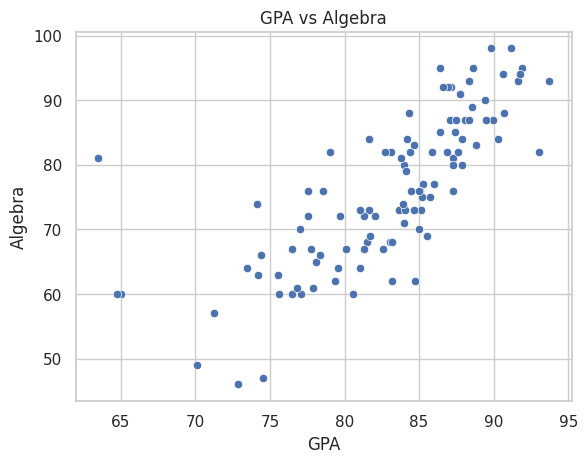

In [33]:
# crea un gráfico de dispersión entre GPA y Algebra
sns.scatterplot(x = df['GPA'], y = df['Algebra'])
plt.title('GPA vs Algebra')

Text(0.5, 1.0, 'GPA vs Estadística')

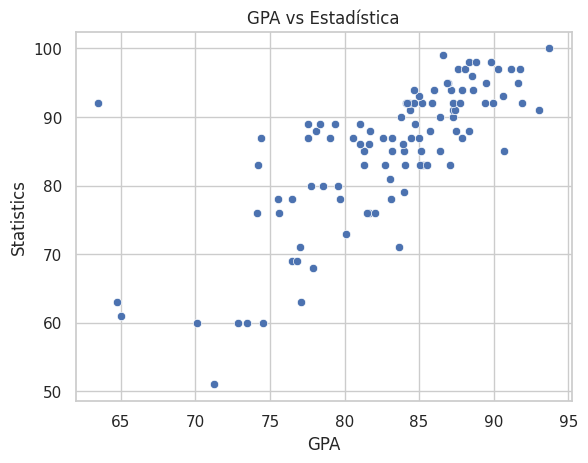

In [34]:
# crea un gráfico de dispersión entre GPA y Estadística
sns.scatterplot(x = df['GPA'], y = df['Statistics'])
plt.title('GPA vs Estadística')

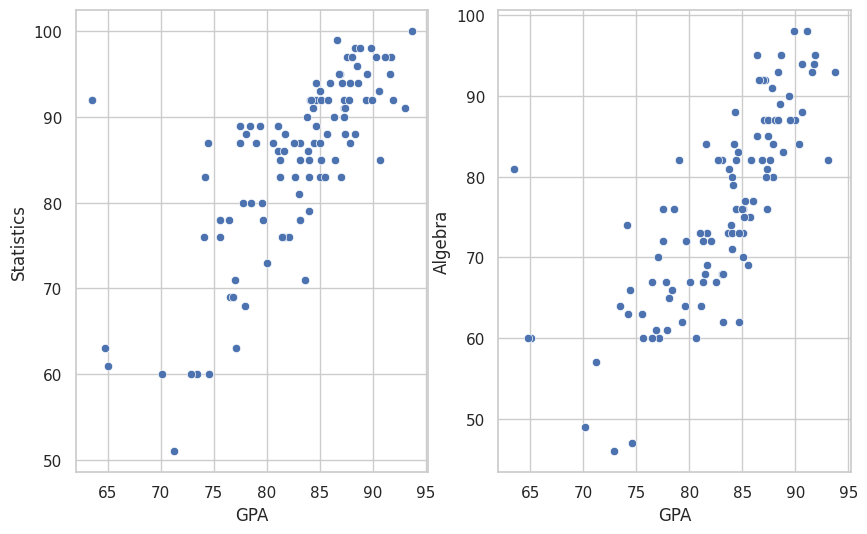

In [35]:
# crea un gráfico de subparcelas
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
sns.scatterplot(x = df['GPA'], y = df['Statistics'], ax = axs[0])
sns.scatterplot(x = df['GPA'], y = df['Algebra'], ax = axs[1])
plt.show()

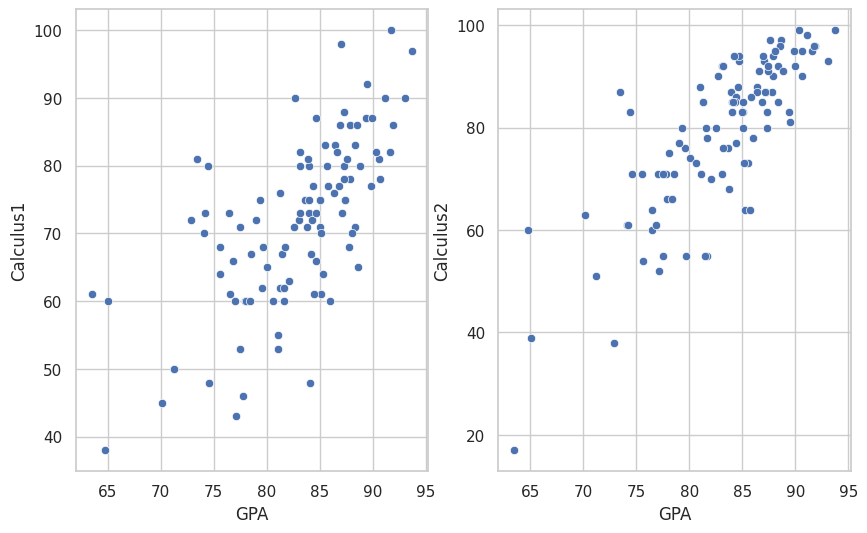

In [36]:
# crea un gráfico de subparcelas
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
sns.scatterplot(x = df['GPA'], y = df['Calculus1'], ax = axs[0])
sns.scatterplot(x = df['GPA'], y = df['Calculus2'], ax = axs[1])
plt.show()

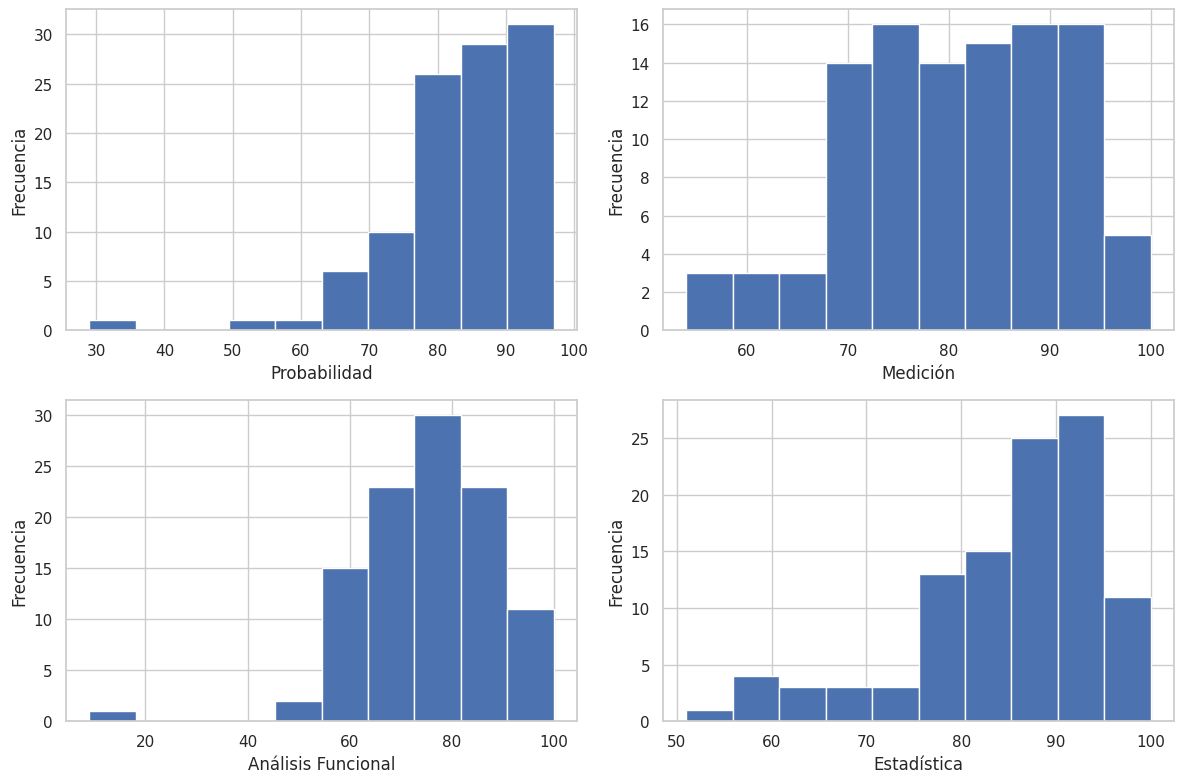

In [37]:
# crea un gráfico con subparcelas
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 8))

axs[0, 0].hist(df['Probability'])
axs[0, 0].set_xlabel('Probabilidad')
axs[0, 0].set_ylabel('Frecuencia')

axs[0, 1].hist(df['Measure'])
axs[0, 1].set_xlabel('Medición')
axs[0, 1].set_ylabel('Frecuencia')

axs[1, 0].hist(df['Functional_analysis'])
axs[1, 0].set_xlabel('Análisis Funcional')
axs[1, 0].set_ylabel('Frecuencia')

axs[1, 1].hist(df['Statistics'])
axs[1, 1].set_xlabel('Estadística')
axs[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### **¿Cuál es el GPA promedio de los estudiantes y que factores influencian el resultado?**

In [38]:
# obtiene el promedio de GPA y redondea a dos decimales
gpa_mean = df['GPA'].mean().round(2)

# imprime el resultado
print(f'El puntuaje de GPA promedio de los estudiantes es: {gpa_mean}')

El puntuaje de GPA promedio de los estudiantes es: 82.96


In [39]:
# Paleta
paleta = sns.color_palette("viridis", n_colors=5)

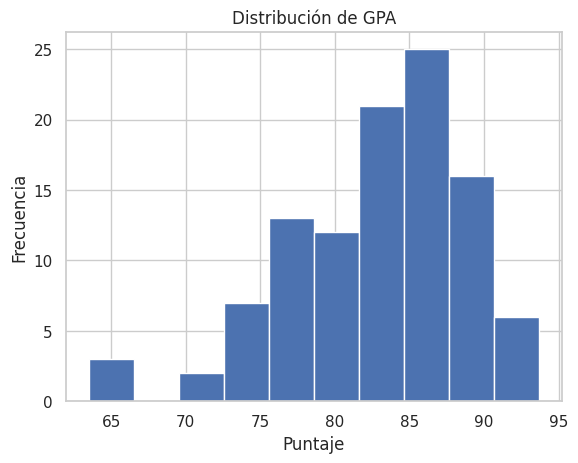

In [40]:
# histograma de GPA
plt.hist(df['GPA'], bins = 10)
plt.title('Distribución de GPA')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

**NOTAS:**

- GPA sigue una distribución sesgada a la derecha con una pequeña cola a la izquierda.
- Tiene un pico máximo de entre 85 y 88 puntos.
- Este pico tiene una frecuencia de histograma de 25 estudiantes con una puntuación comprendida en esos puntos.

Text(0.5, 1.0, 'Distribución de de GPA y Calculo 1')

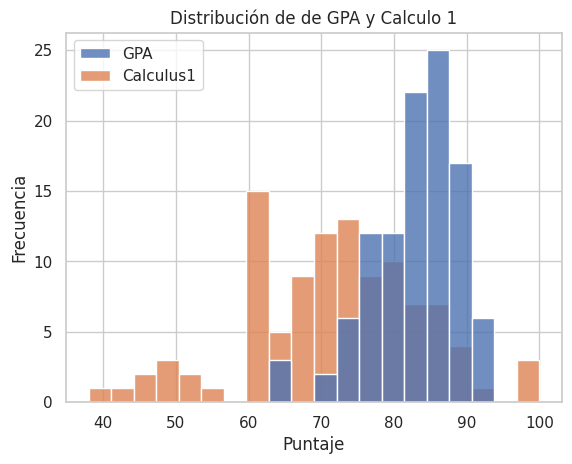

In [41]:
# histograma de GPA
sns.histplot(df[['GPA', 'Calculus1']], bins = 20, alpha = 0.8)
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de de GPA y Calculo 1')

Text(0.5, 1.0, 'Distribución de GPA y Calculo 2')

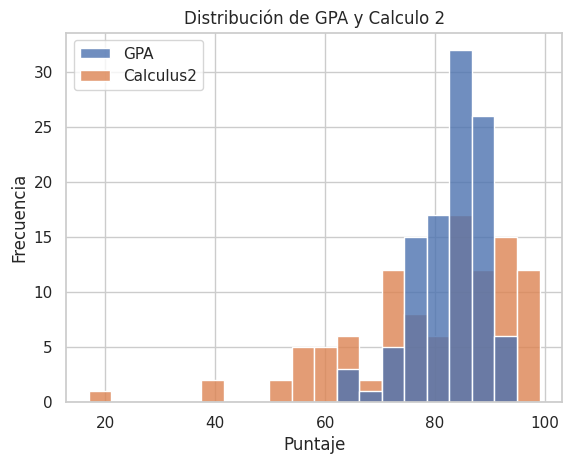

In [42]:
# histograma de GPA
sns.histplot(df[['GPA', 'Calculus2']], bins = 20, alpha = 0.8)
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de GPA y Calculo 2')

Text(0.5, 1.0, 'Distribución de GPA y Probabilidad')

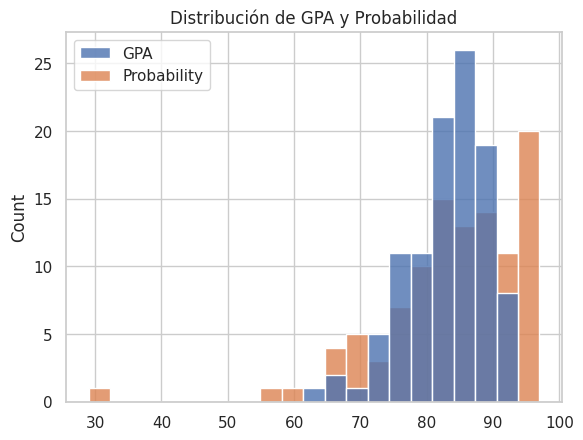

In [43]:
sns.histplot(df[['GPA', 'Probability']], alpha = 0.8)
plt.title('Distribución de GPA y Probabilidad')

array([[<Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'Probability'}>],
       [<Axes: title={'center': 'Statistics'}>,
        <Axes: title={'center': 'Functional_analysis'}>]], dtype=object)

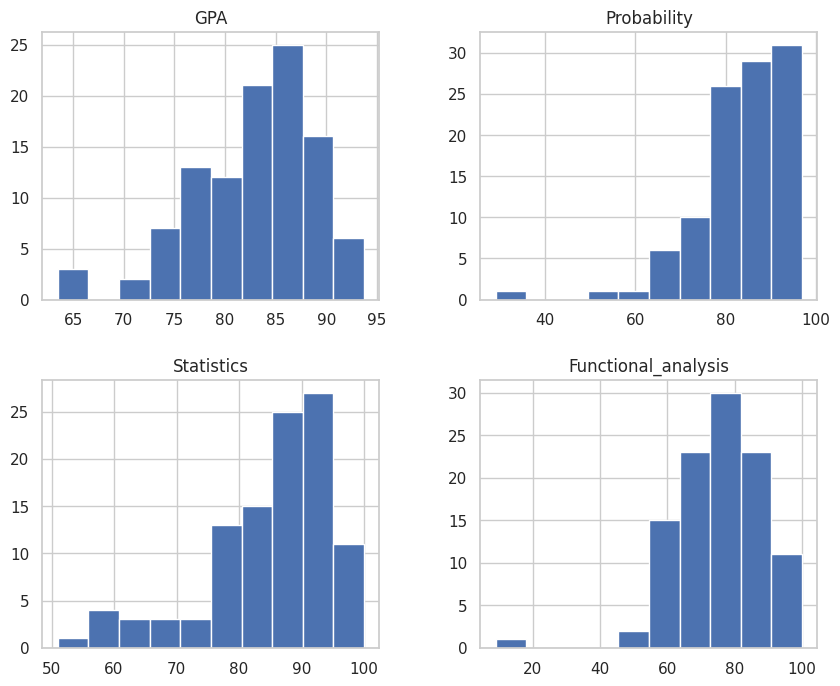

In [44]:
df[['GPA', 'Probability', 'Statistics', 'Functional_analysis']].hist(figsize=(10, 8))

**NOTAS:**

- Las puntuaciones de GPA, Probability, Statistics y Functional analysis siguen una distribución similar.

In [45]:
# obtiene el promedio de GPA por género
df.groupby('gender')['GPA'].mean().sort_values(ascending = False)

gender
female    83.558235
male      81.852162
Name: GPA, dtype: float64

In [46]:
# obtiene el promedio de GPA por género
df.groupby('gender')['GPA'].sum().sort_values(ascending = False)

gender
female    5681.96
male      3028.53
Name: GPA, dtype: float64

**NOTAS:**

- Hay una pequeña superioridad del género femenino en el promedio de puntuación de GPA.
- El puntaje total acumulado de este género asciende a 5681.96, en contraparte del 3028.53 de los masculinos.

In [47]:
# obtiene el recuento de estudiantes por género
df['gender'].value_counts().sort_values(ascending = False)

gender
female    68
male      37
Name: count, dtype: int64

In [55]:
# cuenta los estudiantes con puntuaje de GPA por género
count_male = df[df['gender'] == 'male']['GPA'].count()
count_female = df[df['gender'] == 'female']['GPA'].count()

# imprime el resultado
print(f'La diferencia cuantitaiva entre el género femenino y masculino es de {count_female - count_male} estudiantes.')

La diferencia cuantitaiva entre el género femenino y masculino es de 31 estudiantes.


**NOTAS:**

- Los resultados anteriores pueden ser explicados por el mayor número de estudiantes femininas en el conjunto de datos.

In [56]:
# calcula el rango general de las puntuaciones de GPA
gpa_range = df['GPA'].max() - df['GPA'].min()

# imprime el resultado
print(f"El rango general es: {round(gpa_range, 2)}")

El rango general es: 30.22


In [57]:
# calcula el rango del puntaje obtenido en GPA por género
gpa_count_male = df[df['gender'] == 'male']['GPA'].max() - df[df['gender'] == 'male']['GPA'].min()
gpa_count_female = df[df['gender'] == 'female']['GPA'].max() - df[df['gender'] == 'female']['GPA'].min()

# imprime los resultados
print(f'El rango de GPA para el género masculino es: {round(gpa_count_male, 2)}')
print(f'El rango de GPA para el género femenino es: {round(gpa_count_female, 2)}')

El rango de GPA para el género masculino es: 30.22
El rango de GPA para el género femenino es: 28.31


#### **¿Cuáles son los temas que mejor dominan los estudiantes?**

In [58]:
# obtiene el nombre de las columnas
df.columns

Index(['ID', 'class', 'gender', 'race', 'GPA', 'Algebra', 'Calculus1',
       'Calculus2', 'Statistics', 'Probability', 'Measure',
       'Functional_analysis', 'from1', 'from2', 'from3', 'from4', 'y'],
      dtype='object')

In [64]:
# agrupa por GPA y calcula el promedio y el total de calificaciones
df.groupby('GPA')[['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']].agg({'sum', 'mean'})

Algebra       Calculus1        Calculus2       Statistics         \
          sum  mean       sum   mean       sum  mean        sum   mean   
GPA                                                                      
63.49      81  81.0        61   61.0        17  17.0         92   92.0   
64.75      60  60.0        38   38.0        60  60.0         63   63.0   
65.04      60  60.0        60   60.0        39  39.0         61   61.0   
70.11      49  49.0        45   45.0        63  63.0         60   60.0   
71.22      57  57.0        50   50.0        51  51.0         51   51.0   
...       ...   ...       ...    ...       ...   ...        ...    ...   
91.61      93  93.0        82   82.0        95  95.0         95   95.0   
91.74      94  94.0       100  100.0        96  96.0         97   97.0   
91.90      95  95.0        86   86.0        96  96.0         92   92.0   
93.06      82  82.0        90   90.0        93  93.0         91   91.0   
93.71      93  93.0        97   97.0        99  99.0        100  100.0   

      Probability       Measure        Functional_analysis        
              sum  mean     sum   mean                 sum  mean  
GPA                                                               
63.49          88  88.0      69   69.0                   9   9.0  
64.75          70  70.0      68   68.0                  51  51.0  
65.04          65  65.0      74   74.0                  60  60.0  
70.11          66  66.0      66   66.0                  61  61.0  
71.22          55  55.0      62   62.0                  61  61.0  
...           ...   ...     ...    ...                 ...   ...  
91.61          94  94.0     100  100.0                  93  93.0  
91.74          95  95.0      94   94.0                  93  93.0  
91.90          95  95.0      90   90.0                  95  95.0  
93.06          93  93.0      99   99.0                  94  94.0  
93.71          97  97.0      90   90.0                  90  90.0  

[103 rows x 14 columns]

In [67]:
# obtiene el promedio por asignatura
df[['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']].mean().sort_values(ascending = False)

Statistics             85.133333
Probability            83.876190
Measure                80.761905
Calculus2              78.942857
Algebra                76.057143
Functional_analysis    75.323810
Calculus1              71.961905
dtype: float64

**NOTAS:**

- Los cursos que mejor dominan los estudiantes son:
    - Estadística (85.13).
    - Probabilidad (83.87).
    - Medición (80.76).
- Por lo general, los estudiantes obtienen un rendimiento medio-alto en todas las materias.

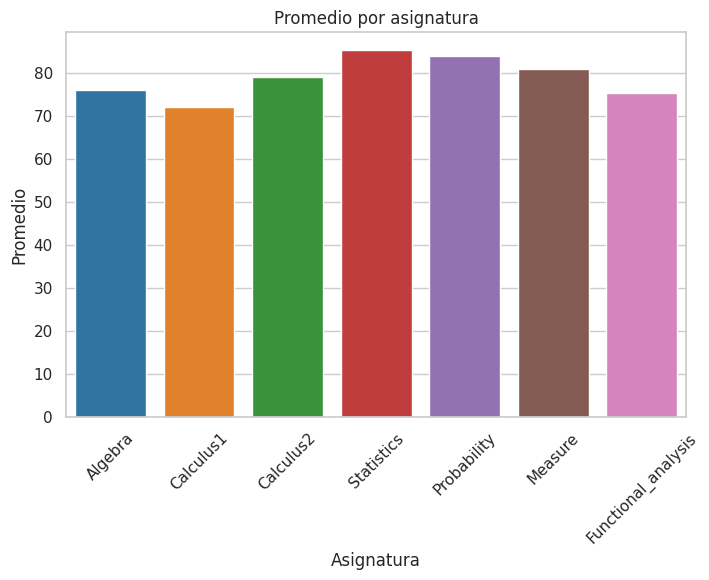

In [76]:
# calcular la media por columna
means = df[['Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis']].mean()

# convertir a DataFrame para Seaborn
means_df = means.reset_index()
means_df.columns = ['Asignatura', 'Promedio']

# gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=means_df, x='Asignatura', y='Promedio',  hue='Asignatura', dodge=False, palette='tab10')
plt.xticks(rotation=45)
plt.title("Promedio por asignatura")
plt.legend([],[], frameon=False)
plt.show()

#### **¿Cuáles son los temas que peor rendimiento registran los estudiantes?**

- De media, los estudiantes obtuvieron un buen rendimiento en todos los cursos.
- Las asignaturas con la menor puntuación promedio son:
    - Functional_analysis (75.32).
    - Calculus1 (71.96).

#### **¿Cuál es el GPA promedio de los estudiantes y que factores influencian el resultado?**

In [78]:
# obtiene el GPA promedio
df['GPA'].mean().round(2)

82.96

**NOTAS:**
- El promedio general de GPA es de 82.96.
- Esto indica un desempeño adecuado de los estudiantes en distintas áreas de aprendizaje.
- Los factores que influencian el resultado de GPA son:
    - las puntuaciones en cursos de Ciencia, Tecnología, Ingeniería y Matemáticas (STEM).
    - La asistencia y participación en clase.
    - La realización de trabajos, talleres y proyectos.

Es necesario mencionar que la forma en que se calcula el GPA tiene en cuenta los factores anteriores. En todo caso, el conjunto de datos nos muestra una ditribución similar entre el rendimiento en las asignaturas y el GPA obtenido.

#### **¿Qué estudiantes obtienen mejor desempeño según su género?**

In [80]:
# obtiene el GPA promedio según el género
df.groupby('gender')['GPA'].mean().round(2).sort_values(ascending = False)

gender
female    83.56
male      81.85
Name: GPA, dtype: float64

**NOTAS:**

- Observamos un mejor rendimiento similar en ambos géneros.
- Las estudiantes de género femenino obtienen de media dos puntos más en su puntuación de GPA que sus pares masculinos.
- Esto se explica por la sobrerepresentación de las muejeres en el conjunto de datos.